# 3.3 특성 공학과 규제 
(다중 회귀, 사이킷런, 과대적합 막기 위한 릿지, 라쏘 회귀)

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [3]:
# 타깃 데이터
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [4]:
#perch_full과 perch_weight를 훈련, 테스트 세트로 나누기 
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state = 42
)

## 사이킷런의 변환기 

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [7]:
#절편 1 > 사이킷런의 선형 모델은 자동으로 절편 추가하므로 굳이 특성 만들 필요 x 
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]])) 
# 절편을 위한 항 제거 , 특성의 제곱, 특성끼리의 곱 

[[2. 3. 4. 6. 9.]]


In [8]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [9]:
# 9개의 특성의 조합 알려줌 
poly.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [10]:
test_poly = poly.transform(test_input)

## 다중회귀모델 훈련하기

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [12]:
print(lr.score(train_poly, train_target))

0.9903183436982124


In [13]:
print(lr.score(test_poly, test_target))

0.9714559911594134


In [14]:
# degree 매개변수를 사용하여 고차항의 최대 차수 지정 가능 
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly= poly.transform(train_input)
test_poly= poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [15]:
train_poly
# 특성의 개수 55개 = 열의 개수 

array([[1.96000000e+01, 5.14000000e+00, 3.04000000e+00, ...,
        7.42244501e+02, 4.38992857e+02, 2.59637799e+02],
       [2.20000000e+01, 5.88000000e+00, 3.52000000e+00, ...,
        1.50793507e+03, 9.02709432e+02, 5.40397483e+02],
       [1.87000000e+01, 5.20000000e+00, 3.12000000e+00, ...,
        8.21240709e+02, 4.92744425e+02, 2.95646655e+02],
       ...,
       [2.56000000e+01, 6.56000000e+00, 4.24000000e+00, ...,
        3.28023719e+03, 2.12015331e+03, 1.37034299e+03],
       [4.20000000e+01, 1.28000000e+01, 6.87000000e+00, ...,
        5.31239245e+04, 2.85126063e+04, 1.53032504e+04],
       [3.45000000e+01, 1.02600000e+01, 6.39000000e+00, ...,
        2.74661189e+04, 1.71060916e+04, 1.06537939e+04]])

In [16]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999991097


In [17]:
print(lr.score(test_poly, test_target))
# 특성의 개수 크게 증가 > 선형 모델 아주 강력 > 훈련 세트 거의 완벽 학습 > 따라서 훈련세트에 과대적합되므로 테스트 세트의 점수는 좋지 않음 

-144.40579242684848


## 규제

In [18]:
# 특성의 스케일 정규화 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

훈련 세트로 학습 변환기를 사용해 테스트 세트까지 변환해야 함!

## 릿지 회귀

In [19]:
from sklearn.linear_model import Ridge
r = Ridge()
r.fit(train_scaled, train_target)
print(r.score(train_scaled, train_target))

0.9896101671037343


In [20]:
print(r.score(test_scaled, test_target))

0.9790693977615397


In [21]:
import matplotlib.pyplot as plt
train_score = []
test_score = []
# alpha 값을 변경할때마다 score() 메서드의 결과를 저장할 리스트 생성 

In [22]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  rr = Ridge(alpha=alpha)
  rr.fit(train_scaled, train_target)
  train_score.append(rr.score(train_scaled, train_target))
  test_score.append(rr.score(test_scaled, test_target))

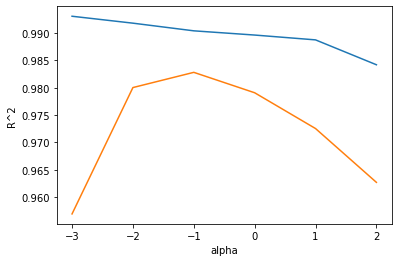

In [23]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
# 왼쪽 : 과대적합/ 오른쪽 : 과소적합 , 가장 적절한 alpha 값 = -1

In [24]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386926


## 라쏘 회귀

In [25]:
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(train_scaled, train_target)
print(ls.score(train_scaled, train_target))

0.989789897208096


In [26]:
print(ls.score(test_scaled, test_target))

0.9800593698421883


In [27]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list :
  lss = Lasso(alpha=alpha, max_iter=10000)
  lss.fit(train_scaled, train_target)
  train_score.append(lss.score(train_scaled, train_target))
  test_score.append(lss.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


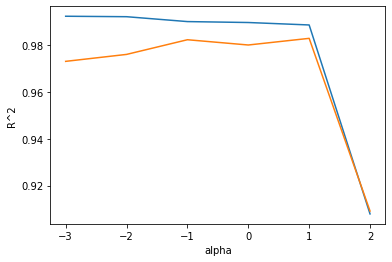

In [28]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
# 최적의 알파 값 = 1

In [29]:
lo=Lasso(alpha=10)
lo.fit(train_scaled, train_target)
print(lo.score(train_scaled, train_target))
print(lo.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [30]:
print(np.sum(lo.coef_ == 0))

40


# 4.1 로지스틱 회귀 
(로지스틱 회귀, 이진 분류 > 클래스 확률 예측, 시그모이드 함수, 소프트맥스 함수)

## 럭키백의 확률 (k-최근접 이웃을 사용하자)

In [31]:
fs=pd.read_csv('https://bit.ly/fish_csv_data')
fs.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [32]:
pd.unique(fs['Species'])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [33]:
fs_input=fs[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [34]:
fs_input

array([[2.42000e+02, 2.54000e+01, 3.00000e+01, 1.15200e+01, 4.02000e+00],
       [2.90000e+02, 2.63000e+01, 3.12000e+01, 1.24800e+01, 4.30560e+00],
       [3.40000e+02, 2.65000e+01, 3.11000e+01, 1.23778e+01, 4.69610e+00],
       [3.63000e+02, 2.90000e+01, 3.35000e+01, 1.27300e+01, 4.45550e+00],
       [4.30000e+02, 2.90000e+01, 3.40000e+01, 1.24440e+01, 5.13400e+00],
       [4.50000e+02, 2.97000e+01, 3.47000e+01, 1.36024e+01, 4.92740e+00],
       [5.00000e+02, 2.97000e+01, 3.45000e+01, 1.41795e+01, 5.27850e+00],
       [3.90000e+02, 3.00000e+01, 3.50000e+01, 1.26700e+01, 4.69000e+00],
       [4.50000e+02, 3.00000e+01, 3.51000e+01, 1.40049e+01, 4.84380e+00],
       [5.00000e+02, 3.07000e+01, 3.62000e+01, 1.42266e+01, 4.95940e+00],
       [4.75000e+02, 3.10000e+01, 3.62000e+01, 1.42628e+01, 5.10420e+00],
       [5.00000e+02, 3.10000e+01, 3.62000e+01, 1.43714e+01, 4.81460e+00],
       [5.00000e+02, 3.15000e+01, 3.64000e+01, 1.37592e+01, 4.36800e+00],
       [3.40000e+02, 3.20000e+01, 3.73

In [35]:
fs_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [36]:
fs_target = fs['Species'].to_numpy()

In [37]:
train_input, test_input, train_target, test_target = train_test_split(fs_input, fs_target, random_state=42)

In [38]:
sc = StandardScaler()
sc.fit(train_input)
train_scaled = sc.transform(train_input)
test_scaled = sc.transform(test_input)

## k-최근접 이웃 분류기의 확률 예측 

In [39]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target) #훈련 세트로 모델을 훈련 
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [40]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [41]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [42]:
pr=kn.predict_proba(test_scaled[:5])
print(np.round(pr, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [43]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


3개의 최근접 이웃을 사용하기 때문에 가능한 확률이 부족하다 

## 로지스틱 회귀

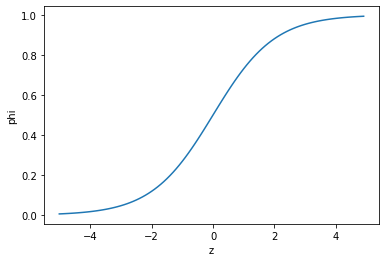

In [44]:
# 확률이 되려면 0과 1 사이의 값이어야 함 > 시그모이드 함수 사용 
z = np.arange(-5, 5, 0.1)
phi = 1/(1+np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

시그모이드 함수의 출력값이 0.5보다 크면 양성, 작으면 음성 > 이진분류 수행 

In [45]:
br_sm_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_br_sm = train_scaled[br_sm_indexes]
target_br_sm = train_target[br_sm_indexes]

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_br_sm, target_br_sm)

LogisticRegression()

In [47]:
print(lr.predict(train_br_sm[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [48]:
print(lr.predict_proba(train_br_sm[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [49]:
print(lr.classes_)

['Bream' 'Smelt']


In [50]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [51]:
de=lr.decision_function(train_br_sm[:5])
print(de)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [52]:
from scipy.special import expit
print(expit(de))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [53]:
# 이제 7개의 생선을 분류해보자 
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))


0.9327731092436975
0.925


In [54]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [55]:
pr=lr.predict_proba(test_scaled[:5])
print(np.round(pr, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [56]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [57]:
dc=lr.decision_function(test_scaled[:5])
print(np.round(dc, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [58]:
from scipy.special import softmax
proba=softmax(dc, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


## 4.2 확률적 경사 하강법 

In [59]:
fh = pd.read_csv('https://bit.ly/fish_csv_data')

In [60]:
fh_input = fh[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fh_target = fh['Species'].to_numpy()

In [61]:
train_input, test_input, train_target, test_target = train_test_split(fh_input, fh_target, random_state=42)

In [62]:
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [63]:
from sklearn.linear_model import SGDClassifier

In [64]:
sc=SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [65]:
# 점진적 학습 훈련
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


In [66]:
sc=SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [67]:
for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))


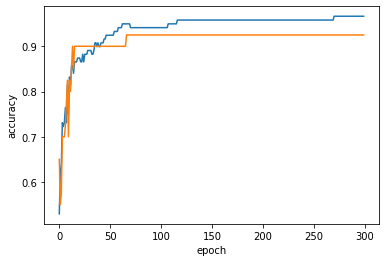

In [68]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [70]:
sc=SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [71]:
#힌지 손실 사용 
sc=SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
